# fundamental concepts of tensors usig tensorflow
* intro to tensors
* information from tensors
* manipulating tensors
* tensors and numpy
* using @tf.function ( a way to speed up regular python functions)
* using gpus with tensorflow (or tpus) for faster numerical computaion

*italicized text*# intro to tensors

# import tensorflow
import tensorflow as tf
print(tf.__version__) # for checking the version of tensorflow

In [10]:
## create tensors with tf.constant()
import tensorflow as tf
scalar  = tf.constant(7)
scalar

# commands - ctrl + MM  - markdown cell, ctrl + my - code cell
#            ctrl + MB - new cell
#            ctrl + shift + space - info about a command

## tensorflow has inbuilt modules which are able to read in data sorces such as how many diiferent images 
## and automatically convert them into tensors and later on the neural network model 
## will process these tensors

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [11]:
# check no of dimensions of a tensor ( ndim stands for no of dimensions)
scalar.ndim

0

In [12]:
# create a vector
vector = tf.constant([10, 10])
vector


<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10])>

In [13]:
# check dimensions of a vector
vector.ndim

1

In [14]:

# create a matrix ( has more than 1 dimension)
import tensorflow as tf
matrix = tf.constant([[11, 7],
                      [7, 11]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[11,  7],
       [ 7, 11]])>

In [15]:
 pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [16]:
# create a matrix ( has more than 1 dimension)
import tensorflow as tf
matrix = tf.constant([[11, 7],
                      [7, 11]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[11,  7],
       [ 7, 11]])>

In [17]:
import tensorflw as tf
print(tf._version_)

ModuleNotFoundError: No module named 'tensorflw'

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
# create tensors with tf.constant()
scalar = tf.constant(7)
scalar

In [18]:
# check the number of dimnsions of a tensor ( ndim stands for number of dimensions)
scalar.ndim

0

In [19]:
# create a vector
vector = tf.constant([10, 10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10])>

In [20]:
# check the dimnsion of our vector
vector.ndim


1

In [21]:
# create a matrix(has more tahn 1 dimension)
matrix = tf.constant([[10, 7],
                    [7, 10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]])>

In [22]:
#create anothe rmatrix
another_matrix = tf.constant([[10., 7.],
                             [3., 2.],
                             [8., 9.]], dtype=tf.float16)  # specify the data type with the dytpe parameter
another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 3.,  2.],
       [ 8.,  9.]], dtype=float16)>

In [23]:
another_matrix.ndim

2

In [24]:
total no of dimensions = no of elements in shape

SyntaxError: invalid syntax (<ipython-input-24-4ed3bdee1d9a>, line 1)

In [25]:
#how to increase the number ofdiensions
# lets create a tensor
# a tensor
tensor = tf.constant([[[1, 2, 3],
                     [4, 5, 6]],
                     [[7, 8, 9],
                    [10, 11, 12]],
                     [[13, 14, 15],
                     [16, 17, 18]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]])>

In [26]:
tensor.ndim

3

# what we've created so far

* Scalar : a single number
* Vector : a number with direction (eg wind speed and direction)
* matrix : a 2-dimensional array of numbers
* Tenso : an n-dimensional array of numbers ( when n can be any number, a 0-dimensional tensor is a scalar, a 1-dimensional tensor is a vector)



In [27]:
#creating tensors with tf.variable
changeable_tensor = tf.Variable([10, 7])
unchangeable_tensor = tf.constant([10, 7])
changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7])>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7])>)

In [28]:
#lets try change one of the elements in our changeable vector
changeable_tensor[0] = 7
changeable_tensor

TypeError: 'ResourceVariable' object does not support item assignment

In [ ]:
# trying .assign()
changeable_tensor[0].assign(7)
changeable_tensor

In [ ]:
# try to change unchangeable tensor
unchangeable_tensor[0].assign(7)
unchangeable_tensor

## creating random tensors
random tensors are tensors of some arbitrary size which contains random numbers

In [ ]:
# create two random tensors
random_1= tf.random.Generator.from_seed(4) # set seed for reproducibility
random_1 = random_1.normal(shape=(3,2))
random_1
random_2 = tf.random.Generator.from_seed(4)
random_2 = random_2.normal(shape=(3, 2))
random_1, random_2, random_1 == random_2

# they have come from a normal distrbution

# they are pseudo random numbers
# settig the seed -> create randm numbers but flavour them with x 

####  shuffle the order of elements in a tensor

In [29]:
# shuffle a tensor ( valuable for when you  want to shuffle your data so that inherent order does not affect learning)
not_shuffled = tf.constant([[10, 7],
                          [3, 4],
                          [2, 5]])
not_shuffled.ndim

# shuffle our non-shffled tensor
tf.random.shuffle(not_shuffled)  # shuffles elements along its first dimension

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 2,  5],
       [10,  7],
       [ 3,  4]])>

In [30]:
# shuffle our non-shffled tensor
tf.random.shuffle(not_shuffled)  # shuffles elements along its first dimension

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]])>

In [31]:
# using seed
# shuffle our non-shffled tensor
tf.random.shuffle(not_shuffled, seed = 42)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 2,  5],
       [ 3,  4],
       [10,  7]])>

In [32]:
tf.random.shuffle(not_shuffled, seed = 42)  # gives differen result

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 2,  5],
       [ 3,  4],
       [10,  7]])>

In [33]:
tf.random.set_seed(42) 
tf.random.shuffle(not_shuffled, seed = 42)  # gives same order

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]])>

In [34]:
# read through tensorflow documentation on random seed generator
# write 5 random tansors and shuffle them\

# operational and global level random seed

# main aim to shuffle the order of tensors is --> for classification neural networks -> any kind of images first may learn only one type of image

In [35]:
tf.random.shuffle(not_shuffled, seed = 42)  3 we get a different order each time

SyntaxError: invalid syntax (<ipython-input-35-b66b7616e12f>, line 1)

In [36]:
# using global radom seed 
tf.random.set_seed(42) # --> gives same order
tf.random.shuffle(not_shuffled, seed = 42)  

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]])>

### if we want our shuffled tensors to be in the same order , we have to use the global level random seed as well as the operational level random seed

### other ways to make tensors

In [37]:
# create a tensor of all ones
tf.ones([10, 7])

<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]], dtype=float32)>

In [38]:
# create a tensor of all zeroes
tf.zeros(shape=(3, 4))

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

In [39]:
### turn numpy arrays into tensors

main differencce NumPy arrays and TensorFlow tensors is that tensors can be run on a GPU ( must faster for numerical computing)

SyntaxError: invalid syntax (<ipython-input-39-7d4003424638>, line 3)

In [40]:
# you can also turn NumPy arrays into tensors
import numpy as np
numpy_A = np.arange(1, 25, dtype = np.int32) # create a NumPy array between 1 and 25
numpy_A

# X = tf.constant(some_matrix) # capital for matrix or tensor
# y = tf.constant(vector)  # non-capital for vector


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [41]:
A = tf.constant(numpy_A)
A

# converted NumPy rray into a tensor

<tf.Tensor: shape=(24,), dtype=int32, numpy=
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])>

In [42]:
# changing shape --> its shape is 24 if we want it into a 3-dimensional tensor
2*3*4
A = tf.constant(numpy_A, shape = (3, 8))  # 3 rows and 8 elements in one column
A  # this would be a tensor becoz it has got more than 1 dimension 
B= tf.constant(numpy_A)  # this is a vector
A, B

(<tf.Tensor: shape=(3, 8), dtype=int32, numpy=
 array([[ 1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16],
        [17, 18, 19, 20, 21, 22, 23, 24]])>,
 <tf.Tensor: shape=(24,), dtype=int32, numpy=
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24])>)

## Getting informatin from tensors

In [43]:
numpy_A.ndim

1

In [44]:
A.ndim

2

NumPy arrays are a very common form of representing numerical data --> can be converted into tensors

basic difference beteween numpy array and tensorflow tensor --> although they may store the same information here 
a tensor formmat can run on a gpu and finding pattrens in numerial data.


### want to get attribute s of tensors

When dealing with tensors want to be aware of the following attributes ->
* Shape - the length of each of the dimensions of a tensor
* Rank - the number of tensor dimensions . A scalar has rank 0, a vector has rank 1, a matrix has rank 2 , a tensor has rank n
* Axis or dimension - a particular dimension of a tensor --> tensor[0], tensor[:, 1]...
* Size - the total number of items in a tensor tf.size(tensor)

In [45]:
# Create a rank 4 matrix --> 4 dimensions
rank_4_tensor = tf.zeros(shape = [2, 3, 4, 5])
rank_4_tensor

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

# when you pass a tensor into a neural network --> has to be in a certain shape and output also has to be in a certain shape

In [46]:
rank_4_tensor[0]

<tf.Tensor: shape=(3, 4, 5), dtype=float32, numpy=
array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]], dtype=float32)>

In [47]:
rank_4_tensor[0][1]

<tf.Tensor: shape=(4, 5), dtype=float32, numpy=
array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)>

In [48]:
rank_4_tensor[0][1][3]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 0., 0., 0., 0.], dtype=float32)>

In [49]:
# rank_4_tensor[0][1][4] -->gives error

In [50]:
rank_4_tensor.shape, rank_4_tensor.ndim, tf.size(rank_4_tensor)

(TensorShape([2, 3, 4, 5]), 4, <tf.Tensor: shape=(), dtype=int32, numpy=120>)

In [51]:
# fget various attributes of our tensors
print("datatype of every element", rank_4_tensor.dtype)
print("Number of dimensions (rank):", rank_4_tensor.ndim)
print("Shape of tensor:", rank_4_tensor.shape)
print("elemnts along the 0 axis:",rank_4_tensor.shape[0])
print("elements along the last axis:", rank_4_tensor.shape[-1])
print("Total number of elemnts in our tensor:", tf.size(rank_4_tensor))

datatype of every element <dtype: 'float32'>
Number of dimensions (rank): 4
Shape of tensor: (2, 3, 4, 5)
elemnts along the 0 axis: 2
elements along the last axis: 5
Total number of elemnts in our tensor: tf.Tensor(120, shape=(), dtype=int32)


In [52]:

print("datatype of every element", rank_4_tensor.dtype)
print("Number of dimensions (rank):", rank_4_tensor.ndim)
print("Shape of tensor:", rank_4_tensor.shape)
print("elemnts along the 0 axis:",rank_4_tensor.shape[0])
print("elements along the last axis:", rank_4_tensor.shape[-1])
print("Total number of elemnts in our tensor:", tf.size(rank_4_tensor))
print("Total number of elemnts in our tensor:", tf.size(rank_4_tensor).numpy())

datatype of every element <dtype: 'float32'>
Number of dimensions (rank): 4
Shape of tensor: (2, 3, 4, 5)
elemnts along the 0 axis: 2
elements along the last axis: 5
Total number of elemnts in our tensor: tf.Tensor(120, shape=(), dtype=int32)
Total number of elemnts in our tensor: 120


### Indexing tensors

Tensors can be indexed like python lists

In [53]:
some_list = [1, 2, 3, 4]
some_list[:2]

[1, 2]

In [54]:
# Get the first 2 elements of each dimension
rank_4_tensor[:2, :2, :2, :2] # we seaparate the dimensions by commas

<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]], dtype=float32)>

In [55]:
some_list[:1]

[1]

In [56]:
# get the first element from each dimension frome each index except for the final one
rank_4_tensor[:1, :1, :1,]

<tf.Tensor: shape=(1, 1, 1, 5), dtype=float32, numpy=array([[[[0., 0., 0., 0., 0.]]]], dtype=float32)>

In [57]:
rank_4_tensor[:1, :1, :1, :]

<tf.Tensor: shape=(1, 1, 1, 5), dtype=float32, numpy=array([[[[0., 0., 0., 0., 0.]]]], dtype=float32)>

In [58]:
rank_4_tensor[:1, :1, :, :1]

<tf.Tensor: shape=(1, 1, 4, 1), dtype=float32, numpy=
array([[[[0.],
         [0.],
         [0.],
         [0.]]]], dtype=float32)>

In [59]:
rank_4_tensor[:, :1, :1, :1]

<tf.Tensor: shape=(2, 1, 1, 1), dtype=float32, numpy=
array([[[[0.]]],


       [[[0.]]]], dtype=float32)>

In [60]:
# create a rank 2 tensor (2 dimensions)
rank_2_tensor = tf.constant([[10, 7],
                           [3, 4]])
rank_2_tensor
rank_2_tensor.shape, rank_2_tensor.ndim

(TensorShape([2, 2]), 2)

In [61]:
some_list, some_list[-1], some_list[:-1]

([1, 2, 3, 4], 4, [1, 2, 3])

In [62]:
# get the last item of eah row of rank_2_matrix
rank_2_tensor[:, -1]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([7, 4])>

In [63]:
rank_2_tensor[:, :-1]

<tf.Tensor: shape=(2, 1), dtype=int32, numpy=
array([[10],
       [ 3]])>

In [64]:
# if we want to add an extra dimension to this tensor
# we may need to alter the size of our tensors so that their shape line up

# add in extra dimension to our rank 2 tensor but information should be same
rank_3_tensor = rank_2_tensor[..., tf.newaxis]
rank_3_tensor

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]])>

In [65]:
rank_3_tensor = rank_2_tensor[:, :, tf.newaxis]
rank_3_tensor

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]])>

In [66]:
# alternative to tf.newaxis
tf.expand_dims(rank_2_tensor, axis=-1) # "-1" means expand the final axis

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]])>

In [67]:
tf.expand_dims(rank_2_tensor, axis=1) #extra dimension u=in the middle

<tf.Tensor: shape=(2, 1, 2), dtype=int32, numpy=
array([[[10,  7]],

       [[ 3,  4]]])>

In [68]:
tf.expand_dims(rank_2_tensor, axis=0) # expand the 0-axis

<tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
array([[[10,  7],
        [ 3,  4]]])>

In [69]:
rank_2_tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]])>

# how the numbers are stored changes just in changing dimension

### manipulating tensors (tensor operations)

In [70]:
# you can add values to a tensor using the addition operator
tensor = tf.constant([[10, 7], [3,4]])
tensor + 10, tensor

(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[20, 17],
        [13, 14]])>,
 <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[10,  7],
        [ 3,  4]])>)

In [71]:
tensor+=20
tensor
tensor-=20

In [72]:
tensor * 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]])>

In [73]:
tensor -10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 0, -3],
       [-7, -6]])>

In [74]:
# we can use the tensorflow built-in function too
tf.multiply(tensor, 10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]])>

In [75]:
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]])>

***Matrix Multiplication
In machine learning, matrix multiplication is one of the most common tensor operations
1. the inner dimnsions must match
2. the resulting matrix has shape of the outer dimensions

In [76]:
# matrix multiplication in tensorflow
print(tensor)

tf.Tensor(
[[10  7]
 [ 3  4]], shape=(2, 2), dtype=int32)


In [77]:
tf.matmul(tensor, tensor)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]])>

In [78]:
tensor * tensor  # it is element wise

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  49],
       [  9,  16]])>

In [79]:
# matricx multiplication with python operator "@"
tensor @ tensor  used for matricx multiplication

SyntaxError: invalid syntax (<ipython-input-79-4b7b1ef36c31>, line 2)

In [80]:
tensor.shape

TensorShape([2, 2])

In [81]:
# with different shapes
# create a tensor (3, 2) tensor
X = tf.constant([[1, 2],
                 [3, 4],
                [5, 6]])
Y = tf.constant([[7, 8],
                 [9, 10],
                [11, 12]])
X*Y

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 7, 16],
       [27, 40],
       [55, 72]])>

In [82]:
X , Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]])>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]])>)

In [83]:
#Matrix multilpy tensors
X @ Y
tf.multiply(X, Y)

InvalidArgumentError: In[0] mismatch In[1] shape: 2 vs. 3: [3,2] [3,2] 0 0 [Op:MatMul]

In [ ]:
# have to change the shape of either matrix
# or cretae new matrice sof same shape

# lets change the shape of y
tf.reshape(Y, shape = (2,3)), Y

In [ ]:
X.shape, tf.reshape(Y, shape = (2, 3)).shape

In [84]:
# try to multiply X by reshaped y
X @ tf.reshape(Y, shape = (2,3))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]])>

In [85]:
tf.matmul(X, tf.reshape(Y, shape = (2, 3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]])>

In [86]:
# reshaping X
X.shape, Y.shape, tf.matmul(tf.reshape(X, shape=(2, 3)), Y)

(TensorShape([3, 2]),
 TensorShape([3, 2]),
 <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[ 58,  64],
        [139, 154]])>)

In [87]:
# can do the same wwith transpose
X, tf.transpose(X), tf.reshape(X ,shape=(2,3))

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]])>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 3, 5],
        [2, 4, 6]])>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 2, 3],
        [4, 5, 6]])>)

In [88]:
# transpose --> flips the axes rather than shuffling elements of tensors

In [89]:
# try matricx mult with transpose rather than reshape
tf.matmul(tf.transpose(X), Y)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]])>

** the dot product
matricx multis also referred to as the dot product
can perform mat mult using -->
* tf.matmul()
* tf.tensordot()

In [90]:
X, Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]])>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]])>)

In [91]:
# perform the dot product on X and Y ( requires X or Y to be transposed)
# transposiing( flipping the axis) results in different outputs rather than reshaping ( reshuffling)

tf.tensordot(tf.transpose(X), Y, axes = 1), tf.matmul(tf.transpose(X), Y)

(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[ 89,  98],
        [116, 128]])>,
 <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[ 89,  98],
        [116, 128]])>)

In [92]:
# perfor mat mult bet x and y(transposed)
tf.matmul(X, tf.transpose(Y))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]])>

In [93]:
# perform mat ult bet x and y (reshaped)
tf.matmul(X, tf.reshape(Y, shape=(2, 3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]])>

In [94]:
# check the values of y, reshape Y, transposed Y
print("Norml Y\n", Y)
print("Y reshaped to (2, 3) : ")
print(tf.reshape(Y, (2, 3)), "\n")
print("Y transposed")
print(tf.transpose(Y))

Norml Y
 tf.Tensor(
[[ 7  8]
 [ 9 10]
 [11 12]], shape=(3, 2), dtype=int32)
Y reshaped to (2, 3) : 
tf.Tensor(
[[ 7  8  9]
 [10 11 12]], shape=(2, 3), dtype=int32) 

Y transposed
tf.Tensor(
[[ 7  9 11]
 [ 8 10 12]], shape=(2, 3), dtype=int32)


In [95]:
tf.matmul(X, tf.transpose(Y))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]])>

In [96]:
# which one to use - transpose or reshape

Generally , when performing matrix mltiplication on two tensors , and one of the axes does'nt line up, use transpose, rather than reshape to satisfy multiplication rules

In [97]:
### changing the dataype of a tensor
# generally default datatpe of tensors will be int32

# create a tensor with dafault datatype ( float 32)
B = tf.constant([1.7, 7.4])
B.dtype

tf.float32

In [98]:
C = tf.constant(([7, 10]))
C.dtype

tf.int32

In [99]:
# change from float 32 to float 16
D = tf.cast(B, dtype = tf.float16)
D, D.dtype

(<tf.Tensor: shape=(2,), dtype=float16, numpy=array([1.7, 7.4], dtype=float16)>,
 tf.float16)

In [100]:
# change fro int32 to float32
E = tf.cast(C , dtype = tf.float32)
E, E.dtype

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 7., 10.], dtype=float32)>,
 tf.float32)

In [101]:
E_float16  = tf.cast(E, dtype = tf.float16)
E_float16

<tf.Tensor: shape=(2,), dtype=float16, numpy=array([ 7., 10.], dtype=float16)>

## Tensors Aggregating

Aggregating tensors means condensing them from multiple values down to a smaller amount of values.

In [102]:
# ---> get the absolute values
D = tf.constant([-7, -10])
D

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ -7, -10])>

In [103]:
tf.abs(D) # for getting absolute values

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10])>

other forms of aggregation

* get the minimm
* get the maximum
* get the mean ofa tensor
* get the sum of a tensor

In [104]:
# creating a radom tensor with values between 0 and 100 of size 50
E = tf.constant(np.random.randint(0, 100, size=50))
E

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([25, 86, 62, 12, 98, 40, 57, 95, 16, 74,  2, 56,  0, 30,  1, 63, 36,
       13,  2, 15, 70, 40, 43, 97, 90, 73,  6, 67, 19, 66, 78, 10, 22, 86,
       18, 28,  7, 64, 77,  5, 94, 40, 53, 50, 38, 78, 20, 31, 59,  8])>

In [105]:
tf.size(E), E.ndim, E.shape

(<tf.Tensor: shape=(), dtype=int32, numpy=50>, 1, TensorShape([50]))

In [106]:
# minimum of a tensor
tf.reduce_min(E)

<tf.Tensor: shape=(), dtype=int32, numpy=0>

In [107]:
# in numPy
np.min(E)

0

In [108]:
# maximum 
tf.reduce_max(E), np.max(E)

(<tf.Tensor: shape=(), dtype=int32, numpy=98>, 98)

In [109]:
# mean
tf.reduce_mean(E), np.mean(E)

(<tf.Tensor: shape=(), dtype=int32, numpy=44>, 44.4)

In [110]:
tf.reduce_sum(E), np.sum(E)

(<tf.Tensor: shape=(), dtype=int32, numpy=2220>, 2220)

In [111]:
#pip install tensorlflow_probability

In [112]:
## tfp means tensorflow probability
## import tensorflow_probability as tfp

## variance and stadard deviation only work with real or complex input
# --> hence convert E to real type
# or
# to find variance of tensor , we need access to tensorflow_probability
#import tensorflow_probability as tfp
# tfp.stats.variance(E)

tf.math.reduce_variance(tf.cast(E, dtype = tf.float32)), np.var(E)

(<tf.Tensor: shape=(), dtype=float32, numpy=924.68>, 924.68)

In [113]:
tf.math.reduce_std(E), np.std(E), E.dtype

TypeError: Input must be either real or complex

## Find the positional maximum and minimum

#### used in neural network output prediction probabilities
#### representtion outputs are referred to as prediction probabilities

In [114]:
# create tensor for finding poitional min and max
tf.random.set_seed(42)
F = tf.random.uniform(shape=[50])
F

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

In [115]:
# at which position max elemnt occurs --> find the positional maximum
tf.argmax(F)

<tf.Tensor: shape=(), dtype=int64, numpy=42>

In [116]:
# find the largest value using the index
F[tf.argmax(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [117]:
# finding the max value value of
tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [118]:
# check for equality
F[tf.argmax(F)] == tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [119]:
tf.argmin(F)

<tf.Tensor: shape=(), dtype=int64, numpy=16>

In [120]:
F[tf.argmin(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.009463668>

In [121]:
tf.reduce_min(F) == F[tf.argmin(F)]

<tf.Tensor: shape=(), dtype=bool, numpy=True>

## squeezing our tensor --> removing all single dimensions

In [122]:
tf.random.set_seed(42)
G = tf.constant(tf.random.uniform(shape=[50]), shape=(1, 1, 1, 1, 50))
G

<tf.Tensor: shape=(1, 1, 1, 1, 50), dtype=float32, numpy=
array([[[[[0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
           0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
           0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
           0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
           0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
           0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
           0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
           0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
           0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
           0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043]]]]],
      dtype=float32)>

In [123]:
G.shape

TensorShape([1, 1, 1, 1, 50])

In [124]:
G.squeezed = tf.squeeze(G)  # removes dimensions of size 1 from shape of  atensor
G.shape, G.squeezed.shape ## gets rid of extra dimensions

(TensorShape([1, 1, 1, 1, 50]), TensorShape([50]))

### one hot encoding tensors

In [125]:
## see ml mastery for this 
# it is a form of numerical encoding
# can one hot encode words and pass those as tensors to neural networks

# create a list of indices
some_list = [0, 1, 2, 3] # could be red, green, blue, purple



# one hot encode this list of indices ---->
tf.one_hot(some_list, depth = 4)  # depth --> usually no of columns

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

In [126]:
# using custom values for one-hot encoding
tf.one_hot(some_list, depth = 4, on_value = 'Y', off_value = 'N')   # using on_value and of_value

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b'Y', b'N', b'N', b'N'],
       [b'N', b'Y', b'N', b'N'],
       [b'N', b'N', b'Y', b'N'],
       [b'N', b'N', b'N', b'Y']], dtype=object)>

#### more math operations 
##### squaring, log, square root

In [127]:
H = tf.range(1, 10)
H

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7, 8, 9])>

In [128]:
tf.square(H) ## squaring

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([ 1,  4,  9, 16, 25, 36, 49, 64, 81])>

In [129]:
# tf.sqrt(H) --> gives error

In [130]:
tf.sqrt(tf.cast(H, dtype = tf.float32)) # find root 
# sqrt requires non-int type


<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([0.99999994, 1.4142134 , 1.7320508 , 1.9999999 , 2.236068  ,
       2.4494896 , 2.6457512 , 2.8284268 , 3.        ], dtype=float32)>

In [131]:
tf.math.log(tf.cast(H, dtype = tf.float32))  #finding log

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([0.       , 0.6931472, 1.0986123, 1.3862944, 1.609438 , 1.7917595,
       1.9459102, 2.0794415, 2.1972246], dtype=float32)>

### NumPy(fundamental package for scientific computing with python) and tensorflow

**  tensorflow interacts beautifully with NumPy arrays

In [132]:
# create a tensor directly from a NumPy array
J = tf.constant(np.array([3., 7., 10.]))
J, type(J)

(<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 3.,  7., 10.])>,
 tensorflow.python.framework.ops.EagerTensor)

In [133]:
# convert from tensor to NumPy array
np.array(J), type(np.array(J))

(array([ 3.,  7., 10.]), numpy.ndarray)

In [134]:
# convert tensor J to  anumpy array
J.numpy(), type(J.numpy())


(array([ 3.,  7., 10.]), numpy.ndarray)

In [135]:
## useful in some of the functionalities
J = tf.constant([3.])
J.numpy()[0]

3.0

In [136]:
## default types of each are slightly different
numpy_J = tf.constant(np.array([3., 7., 10.]))
tensor_J = tf.constant([3., 7., 10.])  
numpy_J.dtype, tensor_J.dtype

# for tensor --> default type is float 32
# for numpy array --> default type is float 64
# NumPy - fundamental pav=ckage for scientific computing in python

(tf.float64, tf.float32)

In [137]:
# regression --> predicting a number
# other -> trying to predict the corners in a object detection problem


# Regression inputs and outputs
# some neural networks may have 1000 hidden layers

# architecture of a regression model - 
# hyperparameter -> a setting that you can change as a data analyst

# define our loss function --> how wrong our neural network predictions are, how wrong the relationships are 
# optimizer -> infrms neuralnetwork how to improve patterns bet input and output variables , to reduce the loss function
# fit model -> telling model to look at bunch ofdifferent examples in the training datat for 100 laps of the data --> that's what epochs variablee stands for


In [138]:
# regression with neural networls in tensorflow

# predicting a numerical variable based on some other combination of variables

# Importing tensorflow
import tensorflow as tf
print(tf.__version__)

2.6.0


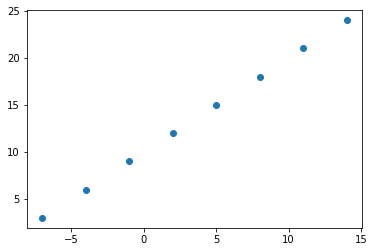

In [140]:
# data to view and fit
# regression model is red line throgh the middle , blue dots are the data points

import numpy as np
import matplotlib.pyplot as plt

# features --> usually denoted by X
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# labels--> usually denoted by y
y = np.array([3.0, 6.0, 9.0, 12.00, 15.0, 18.0, 21.0, 24.0])

# visualize the relationship
plt.scatter(X, y)

# can take X as independent varible, Y as dependent variable



In [141]:
y == X+10 # --> this is the relationship or function bet input features(ind) and our labels(dep)

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [142]:
# input and output shapes

# create a demo tensor for housing price prediction tensor
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [143]:
# in thiis cas we want to use X to predict y
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape, y

((8,), (8,), array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [144]:
# we want to use one input feature of X to predict one y value
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [145]:
X[0].ndim

0

In [146]:
X[0], y[0]

(-7.0, 3.0)

In [147]:
# model the reltionship between X and y

# turn NumPy arrays into tensorswith dtype float 32
X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [148]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

In [149]:
# how to build a model to find the realtionship
# modelling with Tensorflow

# 1- create model --> definr the input and output layers, as awell as the hidden layers of a deep learning model
# 2 -> compiling a model -> define the loss function -> which tells our model how wrong it is , and opyimizer --> tellu our model to improve the patterns its learning
#  and evaluation metrics --> what we can use to interpret the performnce of our model
# 3 -> fitting a model -> lettin the model try to find patterns between X and y( features and labels)


# building or picking a model often involves step 1 and 2 -> always have to compile it
# step 3 - fitting the model, epochs - look at the training data 5 times
# step 4 - evaluate our model -> on testing data

In [150]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [151]:
# set random seed -> for reproducability
tf.random.set_seed(42)

# 1 create a model using the sequential API

# --> telling to tensorflow --> wnat yo cretae a model and want you to sequentially go throgh the following
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
 # make with 1 layer  , used 1 - becausse in this case we want a model which takes input 1 no and predict one no.  
    # tf.keras.layers.Dense(1)  # add them to ypur layer
    # tf.keras.layers.Dense(1) --> no of diiferenrr hidden layers
    #(1) -- no of ddifefrent hidden neurons in each of those layers

# or

# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))
# model.add(tf.keras.layers.Dense(1))



# can put layers, can use .add etod to add them to the sequential model
# or can put them into a list as done above and them to your layer


# 2 compile the model
model.compile(loss = tf.keras.losses.mae,          
            optimizer=tf.keras.optimizers.SGD(),     
            metrics = ["mae"])

# mae is shrt for mean absolute error, computes the mean absolute error between labels and predictions, on average how wrong our prediction is
#  sgd is short for stochstic gradient descent
    
# 3 . fit the model
# fit the model on X and y for 5 laps,
#  telling our model that lokk at X and y and try and figure out the patterns and you have 5 oppurtunities to go throgh all X and y  can set it to more

model.fit(X, y, epochs=5)  


Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mae: 10.9748


In [152]:
# loss --> is our loss function --> how wrong oyr deep neural network is 

# because we have set our metrics same as loss function - we get same output in evaluation metric

In [153]:
# to make prediction using our model
# check out X and y
X ,y


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [154]:
# make a prediction using our model

model.predict([17.0])

array([[12.716021]], dtype=float32)

In [155]:
model.predict([11.0])

array([[8.245661]], dtype=float32)

In [156]:
y_pred = model.predict([17.0])
y_pred  # on average 11 points off where it should be
y_pred, y_pred+11

(array([[12.716021]], dtype=float32), array([[23.71602]], dtype=float32))

In [157]:
# improve our model

# can improve model by altering the steps we took to create a model

# creating the model --> we migth add more layers, increase the number of hidden units ( also called neurons) within each hidden layers, 
# we might chnage the activation functions of each layer

# --> compiling the model --> can change the optimization function or the laerning rate of the optiixation function

# --> fitting the model --> can fit a model for more epochs ( leave it training for longer) or on more data ( give model more example sto learn from)

# epochs --> no of times looking at our training data

In [158]:
# larger model -->now has 4 hidden layers, hidden neurons in each hidden layers is 100, in compiling change optimization to adam epochs increased to 100 

# adam optimization - the optimixzer tells our model how it can improve, adam optimizer is a very comon and useful optimizer 
# lr parameter - learning rate, how much it should improve every step larger lr -> more the adam optimizer pushes the model to improve, smaller lr - smaller steps our optmizer tells our neural network to improve

# in fitting, larger model takes more time to figure out patterns 
# can split dataset into subsets

In [178]:
# by increasing the number of epochs --> looking the training data 100 times

# create model  --> its a sequential model --> meaning it will run from bottom to top, pass throgh this one layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile model
# defined our loss function as mean absolute error 
model.compile(loss=tf.keras.losses.mae,
              optimizer =tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# fit the model ( train for longer)
model.fit(X, y, epochs = 100)

# the final loss and mae 
#trying to get this lower (11)

Epoch 1/100
1/1 [==============================] - 1s 582ms/step - loss: 7.9432 - mae: 7.9432
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 7.8107 - mae: 7.8107
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 7.6782 - mae: 7.6782
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 7.5457 - mae: 7.5457
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 7.4700 - mae: 7.4700
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 7.4644 - mae: 7.4644
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 7.4587 - mae: 7.4587
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 7.4531 - mae: 7.4531
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 7.4475 - mae: 7.4475
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 7.4419 - mae: 7.4419
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 7.43

1/1 [==============================] - 0s 6ms/step - loss: 6.9975 - mae: 6.9975
Epoch 90/100
1/1 [==============================] - ETA: 0s - loss: 6.9919 - mae: 6.991 - 0s 5ms/step - loss: 6.9919 - mae: 6.9919
Epoch 91/100
1/1 [==============================] - 0s 6ms/step - loss: 6.9862 - mae: 6.9862
Epoch 92/100
1/1 [==============================] - 0s 7ms/step - loss: 6.9806 - mae: 6.9806
Epoch 93/100
1/1 [==============================] - 0s 5ms/step - loss: 6.9750 - mae: 6.9750
Epoch 94/100
1/1 [==============================] - 0s 5ms/step - loss: 6.9694 - mae: 6.9694
Epoch 95/100
1/1 [==============================] - 0s 9ms/step - loss: 6.9638 - mae: 6.9638
Epoch 96/100
1/1 [==============================] - 0s 6ms/step - loss: 6.9581 - mae: 6.9581
Epoch 97/100
1/1 [==============================] - 0s 8ms/step - loss: 6.9525 - mae: 6.9525
Epoch 98/100
1/1 [==============================] - 0s 7ms/step - loss: 6.9469 - mae: 6.9469
Epoch 99/100
1/1 [===========================

In [160]:
model.predict([10])

array([[17.833738]], dtype=float32)

In [161]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [162]:
model.predict([-7])

array([[-11.081117]], dtype=float32)

In [163]:
model.predict([111
            ])

array([[189.622]], dtype=float32)

In [164]:
# so just by altering one hyperparameter of our model -- no of epochs -- decreased our loss and mae from 11 to 7 

In [177]:
# prediction
model.predict([17.0])

array([[29.955261]], dtype=float32)

In [172]:
# also can change the optimizer, can add one hidden layer, can increase the number of neurons in each hidden layer

# creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model

model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr=0.0001),
              metrics = ["mae"])

# fit the model

model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 708ms/step - loss: 10.5874 - mae: 10.5874
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 10.5869 - mae: 10.5869
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 10.5865 - mae: 10.5865
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.5860 - mae: 10.5860
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5856 - mae: 10.5856
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5851 - mae: 10.5851
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5847 - mae: 10.5847
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5842 - mae: 10.5842
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 10.5838 - mae: 10.5838
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 10.5833 - mae: 10.5833
Epoch 11/100
1/1 [==============================] - 0s 6m

In [179]:
model.predict([17])

array([[30.130241]], dtype=float32)

In [186]:
# making another change to improve our model --> increase one layer
## 
# creating the model with an extra hidden layer (with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = "relu"),  # relu activation  can also take --> # can take activation function = None
    tf.keras.layers.Dense(1)
])

# compile the model

model.compile(loss=tf.keras.losses.mae,   # or can write loss = "mae",  
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# fit the model

model.fit(X, y, epochs = 100)  # first features come(X) , then comes labels(Y) 

# mae - on an average , how wrong our model prediction is

Epoch 1/100
1/1 [==============================] - 1s 516ms/step - loss: 12.1815 - mae: 12.1815
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.6749 - mae: 11.6749
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 11.1534 - mae: 11.1534
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.6492 - mae: 10.6492
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.1213 - mae: 10.1213
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 9.5802 - mae: 9.5802
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 9.0121 - mae: 9.0121
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 8.4049 - mae: 8.4049
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 7.7530 - mae: 7.7530
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 7.0502 - mae: 7.0502
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - 

In [187]:
# make prediction
model.predict([17])

# in this case it gives even more error but mae is slower
# --->  implies that our model may be overfitting --> it might be learning the training data too well

# learning patterns bet X and y too well

array([[31.425943]], dtype=float32)

In [185]:
model.predict([-7])

array([[2.9976897]], dtype=float32)

In [ ]:
# fitting --> means during training

# main thing is how our model performs on real data

In [189]:
# making another change to improve our model --> increase one layer
## 
# creating the model with an extra hidden layer (with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),  # relu activation  can also take --> # can take activation function = None
    tf.keras.layers.Dense(1)
])

# compile the model

model.compile(loss=tf.keras.losses.mae,   # or can write loss = "mae",  
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["mae"])

# fit the model

model.fit(X, y, epochs = 100)  # first features come(X) , then comes labels(Y) 

# mae - on an average , how wrong our model prediction is

Epoch 1/100
1/1 [==============================] - 1s 528ms/step - loss: 13.3616 - mae: 13.3616
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 13.2981 - mae: 13.2981
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 13.2346 - mae: 13.2346
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 13.1711 - mae: 13.1711
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 13.1077 - mae: 13.1077
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 13.0442 - mae: 13.0442
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 12.9807 - mae: 12.9807
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 12.9172 - mae: 12.9172
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 12.8536 - mae: 12.8536
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 12.7900 - mae: 12.7900
Epoch 11/100
1/1 [==============================] - 0s 5

1/1 [==============================] - 0s 5ms/step - loss: 7.0269 - mae: 7.0269
Epoch 89/100
1/1 [==============================] - 0s 5ms/step - loss: 6.9353 - mae: 6.9353
Epoch 90/100
1/1 [==============================] - 0s 13ms/step - loss: 6.8431 - mae: 6.8431
Epoch 91/100
1/1 [==============================] - 0s 7ms/step - loss: 6.7503 - mae: 6.7503
Epoch 92/100
1/1 [==============================] - 0s 4ms/step - loss: 6.7062 - mae: 6.7062
Epoch 93/100
1/1 [==============================] - 0s 8ms/step - loss: 6.6943 - mae: 6.6943
Epoch 94/100
1/1 [==============================] - 0s 6ms/step - loss: 6.6827 - mae: 6.6827
Epoch 95/100
1/1 [==============================] - 0s 4ms/step - loss: 6.6714 - mae: 6.6714
Epoch 96/100
1/1 [==============================] - 0s 6ms/step - loss: 6.6603 - mae: 6.6603
Epoch 97/100
1/1 [==============================] - 0s 3ms/step - loss: 6.6495 - mae: 6.6495
Epoch 98/100
1/1 [==============================] - 0s 4ms/step - loss: 6.6388 - m

In [190]:
# new sample 
model.predict([17.0])

array([[31.484047]], dtype=float32)

In [193]:
# changing the learning rate  --> optimizer tells our model how it should improve, lr tells it by how much it should

# making another change to improve our model --> increase one layer
## 
# creating the model with an extra hidden layer (with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),  # relu activation  can also take --> # can take activation function = None
    tf.keras.layers.Dense(1)
])

# compile the model

model.compile(loss=tf.keras.losses.mae,   # or can write loss = "mae",  
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),   # adam lr = 0.001 by default -> increase it by 10  = 0.1
              metrics = ["mae"])

# fit the model

model.fit(X, y, epochs = 100)  # first features come(X) , then comes labels(Y) 

# mae - on an average , how wrong our model prediction is

Epoch 1/100
1/1 [==============================] - 1s 568ms/step - loss: 14.4889 - mae: 14.4889
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 13.7204 - mae: 13.7204
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 12.9558 - mae: 12.9558
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 12.1943 - mae: 12.1943
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 11.4335 - mae: 11.4335
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.6713 - mae: 10.6713
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 9.9055 - mae: 9.9055
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 9.1344 - mae: 9.1344
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 8.3556 - mae: 8.3556
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 7.5670 - mae: 7.5670
Epoch 11/100
1/1 [==============================] - 0s 6ms/step -

Epoch 89/100
1/1 [==============================] - 0s 11ms/step - loss: 0.1765 - mae: 0.1765
Epoch 90/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2222 - mae: 0.2222
Epoch 91/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1781 - mae: 0.1781
Epoch 92/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0933 - mae: 0.0933
Epoch 93/100
1/1 [==============================] - 0s 9ms/step - loss: 0.0846 - mae: 0.0846
Epoch 94/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2120 - mae: 0.2120
Epoch 95/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1663 - mae: 0.1663
Epoch 96/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2844 - mae: 0.2844
Epoch 97/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3299 - mae: 0.3299
Epoch 98/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2170 - mae: 0.2170
Epoch 99/100
1/1 [==============================] - 0s 5ms/step - los

In [197]:
model.predict([17.0])   # best model sso far as we see from the results

array([[26.587706]], dtype=float32)

In [198]:
# so we can see that in this case, adjusting the lr of optimizer yields best results

In [199]:
# imp --> learning rate is most imp hyperparameter can change on all neural networks

In [200]:
# creating a larger data set

# common ways to improve a model -
# adding layers
# increase no of hidden units
# change the activation function
# change the learning rate
# fitting on more data 
# fitting for longer --> increase no of epochs

In [201]:
# evaluating a model -- how exactly  do we tell how good ourr model predictions are, how good the patterns it has laerned bet X and y are

## normally, a workflow for building neural networks is -->

# build a model, fit it, evaluate it, tweak a model, fit it, evaluate it, tweak a model, fit it, evaluate it, .....

In [202]:
# hyperparameter -> like  a dial n your neurakl network you can adjust to see how it improves

# parameter --> usually the patterns that neural network learns

In [203]:
# for evaluation --> visualize, .....

# we should visualize 
# visualize the data -> what data are we working eith, how does it look like
# model itself, how does it look klike
# training of a model --> how does a model perform while it learns
# predictions of the model - how do the predictions of a model line up against the ground truth (original labels)

# for building --> experiment, ....

In [205]:
# make a bigger data set 
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [206]:
# labels for the data set
y = X+10;  # formual we wnat our model to learn
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

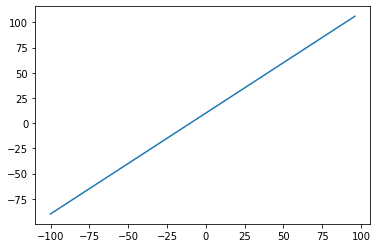

In [207]:
# visulaize the data
import matplotlib.pyplot as plt
plt.plot(X, y)

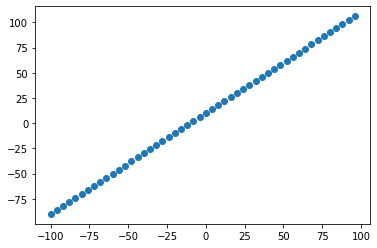

In [209]:
plt.scatter(X, y)

In [211]:
# the 3 sets... split X and y into training and test set
# not going to fit and evaluate om the same set

# actually --> 3 different set sof data 
# 1 --> training set -> the model learns from this data, which is typically 70-80% of the total data you have available

# 2 --> validation set -> the model gets tuned on this data
#   this is where you tweak different things --> changing no of hidden layers, optimization function, will test how hese tweaks affected your model's performance on the validation set
#    typically 10-15% of the data available


# 3 --> the model gets evaluated on this data to test what it has learn, has typically 10-15% of the total data available


# check the length of how many samples we have 
len(X)

50

In [216]:
# split the data into train and test sets

X_train = X[:40] # first 40 are training samples ( 80 % of the data) --> training features
# train_data =
y_train = y[:40] # testing features

X_test = X[40:] # last 10 are testing samples (20% of the data) --> training labels
y_test = y[40:]  # test labels
# test_data =  

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

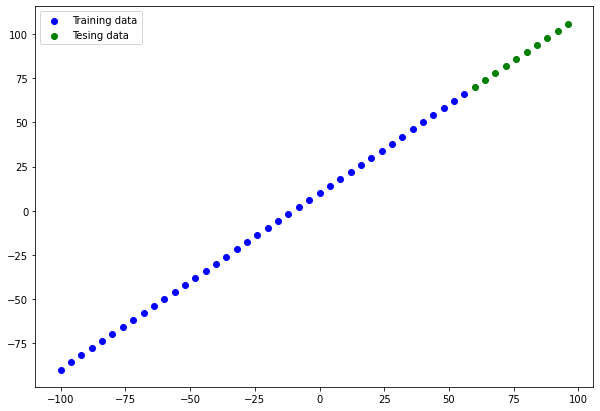

In [220]:
# visualize the data
# training and test set - visualize it


plt.figure(figsize=(10, 7)) # setting figure beccause we have to plot two samples of data
# plot training data in blue
plt.scatter(X_train, y_train, c="b", label = "Training data")  # our model will learn on this

#plot test data in green
plt.scatter(X_test, y_test, c="g", label = "Tesing data")  # want our model to be able to predict this(given x, what's y)

#shw a legend
plt.legend();

# to visualize your data, or model easier to understand

In [227]:
# build a neural network to take training data to leran the relationships, so that it can oredict our test data

# creating model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)  # one hidden layer --> has one hidden unit because we are using 1 X value to predict one Y value therfore dense layer has one unit 
])

# compile model

model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics =["mae"])

# fit

# model.fit(X_train, y_train, epochs = 100)  # fit on training data only -> blue line in the graph -> want our model to learn patterns in training data to predict patterns  in the test data  


# 1, 2--> instantiates the model here



In [229]:
# visualizing the model --> how model looks like before running it

model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [230]:
model.build()

ValueError: You must provide an `input_shape` argument.

In [235]:
X.shape, X[0].shape  # ---> we want only one sample of X so did X[0].shape --> scalar value

(TensorShape([50]), TensorShape([]))

In [236]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [253]:
# creating a model which builds automatically by defining the input shape arguement in the first layer

tf.random.set_seed(42)

# create model --> Sequential model runs from top to bottom
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1])  # one hidden layer --> has one hidden unit because we are using 1 X value to predict one Y value therfore dense layer has one unit 
])


# input_shape = 1 because we are passing one no to predict another no


# compile model

model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics =["mae"])


In [254]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 10)                20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [243]:
# model.summmary shows us the layers that it contains , the output shape, and the no of parameters of each layer

# in above model --> layer is type dense
# dense means fully connected --> all neurons in one layer are connected to all neurons in next layer

# param --> parameters no 


# neural network creates tensors of diffferent values, patterns 
# total no of parameters -> is the different no of patterns our model is going to try and learn, relation bet X and y data

# total params -->> total no of paramaters in the model -> these are the parameters that our model is going to learn
# Trainable parameters --> these are the parameters(patterns) the model can update as it trains.
# Non-trainabe parameters --> these parameters are'nt updated during training ( this is typical when we bring in already learned parameters or patterns from other models during transfer learning) 

In [244]:
# if we want to see actual parameters in a dense layer -->

# will find weights matrix and a bias vector

# within hidden layer --> we have a bunch of different parameters 

In [245]:
# for more about trainable parametres within a layer, check out MIT'S intro to deep learning module 

# Imp --> no of hidden units in the dense layer and see how it affects the no of parametrs -> total and trainable by using model.summary() 

In [255]:
# get a summary of our model
model.summary()  # here sequential_22 shows that we have created 22 sequential models

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 10)                20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [246]:
# shpws that there are 2 trainable params per hidden unit in our dense layer

In [256]:
# fit our model to the training data
model.fit(X_train, y_train, epochs = 100, verbose = 0)

# verbose --> 0 --> will not get any output

In [249]:
model.fit(X_train, y_train, epochs = 100, verbose = 1)


Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 7.4494 - mae: 7.4494
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 9.2391 - mae: 9.2391
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 9.6116 - mae: 9.6116
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 8.7602 - mae: 8.7602
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 9.7251 - mae: 9.7251
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 8.9002 - mae: 8.9002
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 8.0002 - mae: 8.0002
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 8.1138 - mae: 8.1138
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 19.0986 - mae: 19.0986
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 9.3698 - mae: 9.3698
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - loss: 7.549

In [258]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 10)                20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [284]:
# plot_model(model=model, show_shapes="True")

In [280]:
# creating a model which builds automatically by defining the input shape arguement in the first layer

tf.random.set_seed(42)

# create model --> Sequential model runs from top to bottom
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="Input_layer"),  # one hidden layer --> has one hidden unit because we are using 1 X value to predict one Y value therfore dense layer has one unit 
    tf.keras.layers.Dense(1, name="Output_layer")
], name ="model_1")


# input_shape = 1 because we are passing one no to predict another no


# compile model

model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics =["mae"])


In [281]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
Output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [282]:
model.fit(X_train , y_train, epochs=100, verbose=0)

In [344]:
# visualize model predictions

# to visualize predictions, its a agood idea to plot them against the ground truth labels.
# often we see this in form of y_test or y_true versus y_pred (ground truth versus your model predictions)

# make predictions
y_pred = model.predict(X_test)
y_pred

array([[ 70.552185],
       [ 75.13991 ],
       [ 79.72764 ],
       [ 84.315346],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07852 ],
       [102.666245],
       [107.253975],
       [111.84169 ]], dtype=float32)

In [345]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [346]:
# visualize the comparison
# if fwant to use a fuctionality in the future --> can use it in a function
# creating a plotting function

def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred):
    # plots training data, tetst data, and compares predictions to ground truth labels
    plt.figure(figsize=(10, 7))
    #training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    #test data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    #model's prredictions in red and want to compare  them to the test data 
    plt.scatter(test_data, predictions, c="r", label = "Predictions")
    # show legend
    plt.legend();

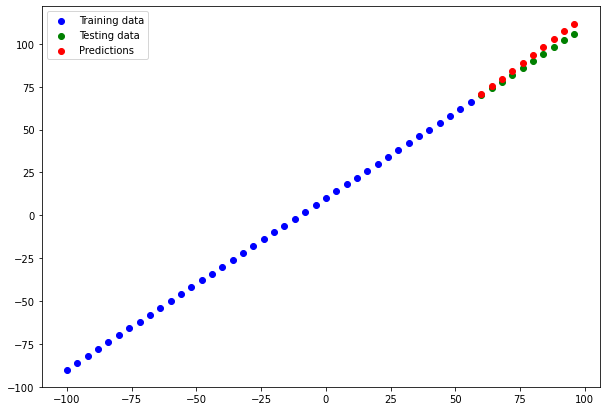

In [347]:
plot_predictions()

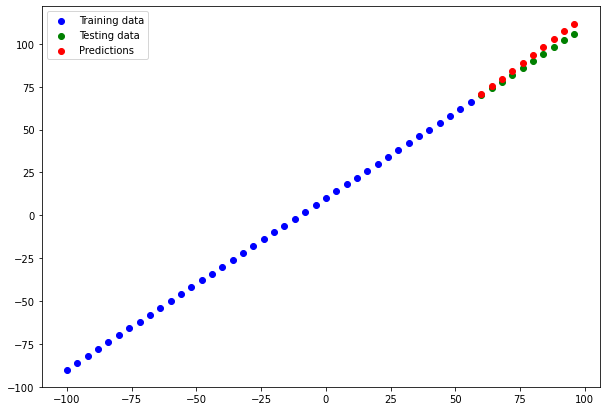

In [348]:
plot_predictions(train_data =X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred)

In [349]:
# the distance between the red and green dots could be a fairly large erroor depending on the scale
# can figure this out by some regression evaluation metrics

# Depending on the problem we work , there are different evaluation metrics to evaluate your model's performance
# Since we work on a gregression problem, two main metrics are mae--mean absolute error--> on average, how wrong is each pf our model's predictions is
# mse - mean square error --> square the average errors and then find the average  -> used when larger errors are more significant than smaller errors

# abs(labels - predictions)
# y with hat ---> is y_predictions



In [350]:
# evaluate the model on test set

model.evaluate(X_test, y_test)  # in doc string --> return s the loss value and metrics values for the model in the test mode 

1/1 [==============================] - 0s 230ms/step - loss: 3.1969 - mae: 3.1969


[3.1969382762908936, 3.1969382762908936]

In [351]:
# calculate the mean absolute error
# tf.keras.losses.MAE(y_test, y_pred)

mae = tf.metrics.mean_absolute_error(y_true = y_test, y_pred = tf.constant(y_pred))
mae
# this gives us metric for each of the test labels and predictions --> maybe because y_pred is not a tensor --> turn y_pred into a rensor 

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558252 , 14.1160555, 11.708944 , 10.336931 , 10.       ,
       10.698161 , 12.447113 , 15.332995 , 19.253975 , 23.84169  ],
      dtype=float32)>

In [352]:
tf.constant(y_pred)


<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.552185],
       [ 75.13991 ],
       [ 79.72764 ],
       [ 84.315346],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07852 ],
       [102.666245],
       [107.253975],
       [111.84169 ]], dtype=float32)>

In [353]:
y_test, y_pred


(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>,
 array([[ 70.552185],
        [ 75.13991 ],
        [ 79.72764 ],
        [ 84.315346],
        [ 88.90308 ],
        [ 93.49081 ],
        [ 98.07852 ],
        [102.666245],
        [107.253975],
        [111.84169 ]], dtype=float32))

In [354]:
# but y_pred and y_test are not in same shape
# in comparison we have to the reshape the tensors for same format

#y_pred = tf.reshape(tf.constant(y_pred), shape=(10))
#y_pred

In [355]:
#tf.metrics.mean_absolute_error(y_true=y_test, y_pred = y_pred)

In [357]:
# or can use the squueze method --> remove one dimension of y_pred tensor
tf.squeeze(y_pred), y_pred

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 70.552185,  75.13991 ,  79.72764 ,  84.315346,  88.90308 ,
         93.49081 ,  98.07852 , 102.666245, 107.253975, 111.84169 ],
       dtype=float32)>,
 array([[ 70.552185],
        [ 75.13991 ],
        [ 79.72764 ],
        [ 84.315346],
        [ 88.90308 ],
        [ 93.49081 ],
        [ 98.07852 ],
        [102.666245],
        [107.253975],
        [111.84169 ]], dtype=float32))

In [359]:
# calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae  # gives same result as evaluate function

<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>

In [363]:
# calcullate the mean squared error
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))  # tf.squeeze removes the single dimension from the y_pred 
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070127>

In [389]:
# making function for mean_squared_error and mean_absolute_error
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))
def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))


In [390]:
# how to lower difference bet predictions and test labels
# improve model --> build , fit, evaluate it, tweak it, fit, evaluate it, tweak it

# some ways to improve --> 1 get some more data - get more examples for model to train on(more oppurtunities to learn patterns or relationships between labels and features)
#2 . make your model lareger ( using a more complex model) - can add ore layers or more hidden units in each layer
#3. train for longer - give model more chance to find patterns in the data

# 1. model_1 - same as original model, 1 layer, trained for 100 epochs
# 2. model_2 - 2 layers, trianed for 100 epochs
# 3. model_3 - 2 layers, trianed for 500 epochs
# build model 1



In [391]:
tf.random.set_seed(42) # for reproducability as much as possible
model_1 = tf.keras.Sequential([
tf.keras.layers.Dense(1)  # sinle layer
])

model_1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 3s 4ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - l

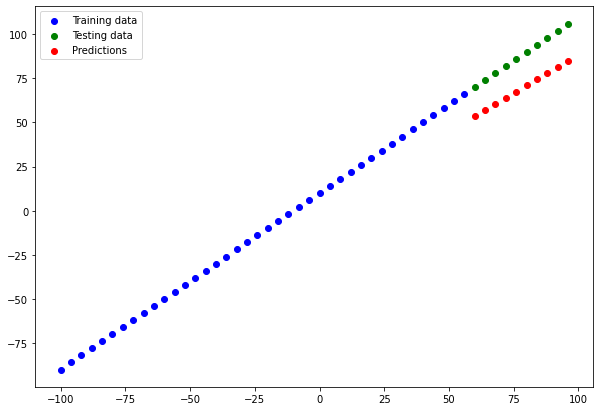

In [392]:
# make and plot predictions for model 1
y_pred_1 = model_1.predict(X_test)  # X_test is data model has never seen, y_test are the actual values
plot_predictions(predictions=y_pred_1)

In [393]:
tf.constant(y_pred_1), tf.squeeze(y_pred_1)

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[53.57109 ],
        [57.05633 ],
        [60.541573],
        [64.02681 ],
        [67.512054],
        [70.99729 ],
        [74.48254 ],
        [77.96777 ],
        [81.45301 ],
        [84.938255]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([53.57109 , 57.05633 , 60.541573, 64.02681 , 67.512054, 70.99729 ,
        74.48254 , 77.96777 , 81.45301 , 84.938255], dtype=float32)>)

In [394]:
# do evaluation metrics for model_1
#mae_1 = mae(y_test, tf.squeeze(y_pred_1))
#mse_1 = mse(y_test, tf.squeeze(y_pred_1))

mae_1 = mae(y_test, (y_pred_1))
mse_1 = mse(y_test, (y_pred_1))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

In [410]:
# Build model_2  --> 2 dense layers or fully connected layers trained for 100 epochs

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
            tf.keras.layers.Dense(10),
            tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])


model_2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 5ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 29.8935 - mse: 1334.8953
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 14.9463 - mse: 281.1076
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1988 - mse: 151.3508
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 40.4763 - mse: 2586.0085
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 27.8687 - mse: 1094.4380
Epoch 11/100
2/2 [==========================

In [411]:
X_test, model_2.predict(X_test)

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96])>,
 array([[ 70.552185],
        [ 75.13991 ],
        [ 79.72764 ],
        [ 84.315346],
        [ 88.90308 ],
        [ 93.49081 ],
        [ 98.07852 ],
        [102.666245],
        [107.253975],
        [111.84169 ]], dtype=float32))

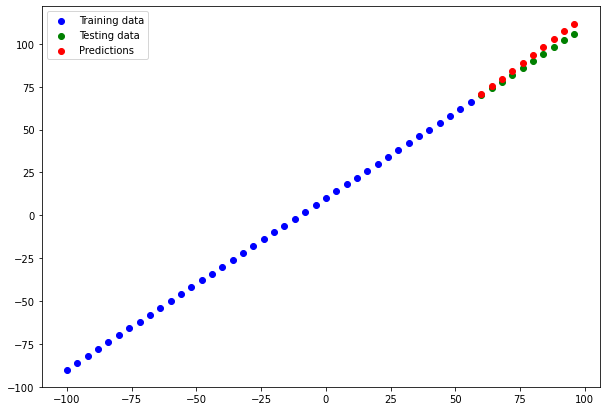

In [412]:
# plotting predictions
y_pred_2 = (model_2.predict(X_test))
plot_predictions(predictions=y_pred_2)

In [417]:
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070127>)

In [424]:
# model 3 --> 2 layers trained for 500 epochs --> trained for longer

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
            tf.keras.layers.Dense(10),
            tf.keras.layers.Dense(1)])    # dense layer with 1 hidden unit --> thT WILL BE THE OUTPUT layer

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

model_3.fit(X_train, y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 1s 4ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 5ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 6ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 4ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 5ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 4ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 27.8687 - mae: 27.8687
Epoch 11/500
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 7ms/step - loss: 10.1499 - mae: 10.1499
Epoch 171/500
2/2 [==============================] - 0s 5ms/step - loss: 18.0464 - mae: 18.0464
Epoch 172/500
2/2 [==============================] - 0s 4ms/step - loss: 28.8377 - mae: 28.8377
Epoch 173/500
2/2 [==============================] - 0s 4ms/step - loss: 16.5279 - mae: 16.5279
Epoch 174/500
2/2 [==============================] - 0s 4ms/step - loss: 11.2115 - mae: 11.2115
Epoch 175/500
2/2 [==============================] - 0s 4ms/step - loss: 27.5839 - mae: 27.5839
Epoch 176/500
2/2 [==============================] - 0s 7ms/step - loss: 8.2680 - mae: 8.2680
Epoch 177/500
2/2 [==============================] - 0s 6ms/step - loss: 9.2580 - mae: 9.2580
Epoch 178/500
2/2 [==============================] - 0s 5ms/step - loss: 18.1440 - mae: 18.1440
Epoch 179/500
2/2 [==============================] - 0s 4ms/step - loss: 10.5995 - mae: 10.5995
Epoch 180/500
2/2 [==============================] - 0s 4m

Epoch 256/500
2/2 [==============================] - 0s 5ms/step - loss: 12.4220 - mae: 12.4220
Epoch 257/500
2/2 [==============================] - 0s 4ms/step - loss: 10.5823 - mae: 10.5823
Epoch 258/500
2/2 [==============================] - 0s 4ms/step - loss: 14.4883 - mae: 14.4883
Epoch 259/500
2/2 [==============================] - 0s 6ms/step - loss: 8.6132 - mae: 8.6132
Epoch 260/500
2/2 [==============================] - 0s 6ms/step - loss: 43.0580 - mae: 43.0580
Epoch 261/500
2/2 [==============================] - 0s 7ms/step - loss: 18.4611 - mae: 18.4611
Epoch 262/500
2/2 [==============================] - ETA: 0s - loss: 5.1868 - mae: 5.186 - 0s 4ms/step - loss: 6.8820 - mae: 6.8820
Epoch 263/500
2/2 [==============================] - 0s 4ms/step - loss: 13.7211 - mae: 13.7211
Epoch 264/500
2/2 [==============================] - 0s 4ms/step - loss: 21.0154 - mae: 21.0154
Epoch 265/500
2/2 [==============================] - 0s 5ms/step - loss: 19.3730 - mae: 19.3730
Epoch 

Epoch 426/500
2/2 [==============================] - 0s 5ms/step - loss: 20.3318 - mae: 20.3318
Epoch 427/500
2/2 [==============================] - 0s 5ms/step - loss: 6.3283 - mae: 6.3283
Epoch 428/500
2/2 [==============================] - 0s 4ms/step - loss: 12.9962 - mae: 12.9962
Epoch 429/500
2/2 [==============================] - 0s 4ms/step - loss: 10.7869 - mae: 10.7869
Epoch 430/500
2/2 [==============================] - 0s 5ms/step - loss: 11.4007 - mae: 11.4007
Epoch 431/500
2/2 [==============================] - 0s 6ms/step - loss: 10.6153 - mae: 10.6153
Epoch 432/500
2/2 [==============================] - 0s 3ms/step - loss: 11.4582 - mae: 11.4582
Epoch 433/500
2/2 [==============================] - 0s 4ms/step - loss: 11.3851 - mae: 11.3851
Epoch 434/500
2/2 [==============================] - 0s 4ms/step - loss: 30.3986 - mae: 30.3986
Epoch 435/500
2/2 [==============================] - 0s 4ms/step - loss: 10.5052 - mae: 10.5052
Epoch 436/500
2/2 [=======================

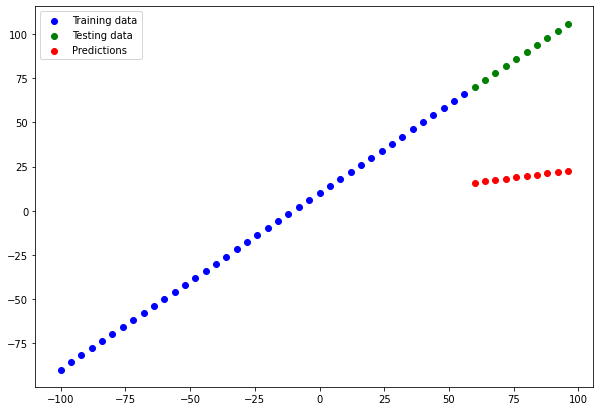

In [429]:
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions = y_pred_3)

# think that model is trained for too long
# this is overfitting --> model has learnt the traininig data very well and does'nt generalize very well at all to data it has'nt sen before

In [432]:
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

In [ ]:
# start with small experiments ( small models) -> make sure they work and then increase the scale when necessary.

In [435]:
# comparing the results of our experiments
# compare models results using  pandas data frame

import pandas as pd

# set model_results as list of lists
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]

# creating data frame
all_results = pd.DataFrame(model_results, columns = ["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,"tf.Tensor(18.745327, shape=(), dtype=float32)","tf.Tensor(353.57336, shape=(), dtype=float32)"
1,model_2,"tf.Tensor(3.19694, shape=(), dtype=float32)","tf.Tensor(13.070127, shape=(), dtype=float32)"
2,model_3,"tf.Tensor(68.713615, shape=(), dtype=float32)","tf.Tensor(4808.0273, shape=(), dtype=float32)"


In [436]:
# getting just the numpy values of all of these


# comparing the results of our experiments
# compare models results using  pandas data frame

import pandas as pd

# set model_results as list of lists
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

# creating data frame
all_results = pd.DataFrame(model_results, columns = ["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196940,13.070127
2,model_3,68.713615,4808.027344


In [440]:
 # can see the model_2 performs best

In [441]:
 # main goal should be to minimize the time between your experiments. The more experiments we do --> more things we can see
 # what does not work --> will get loser to see what works. 

In [437]:
model_2.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [438]:
# above output shows that it has 2 layers -->
# one with 10 hiddden neurons
# output layer with 1 hidden neuron
# it was fit for 100 epochs

In [442]:
# tracking experiments, track results of experiments
# as we build more models --> Tensorboard - a component of the Tensorflow library to help track modelling experiments
# weights and biases -> a tool for tracking all kinds of ml experiments , can be used with Tensorboard

In [444]:
# saving our models, exporting it somewhere else
# saving our model allows us to use them outside jupyter notebook or wherever they were trained, can be used in a web application or a mobile app

In [447]:
# saving a model --> 2 formats --> SavedModel format,  HDF5 extension       
# two main formats we can save our model's to --> SavedModel format, HDF5 format

In [448]:
# save modl using SavedModel format
model_2.save("learned_to_save_model")  # we get a folder here

INFO:tensorflow:Assets written to: learned_to_save_model\assets


In [449]:
# .pb format is called a protoby file
# to make sure that our model saved correctly is by loading it back in and checking in 

In [450]:
# saving model in HDF5 format --> hierarchical data format
model_2.save("learned_to_save_model_HDF5.h5")  # we get a single file here

In [451]:
# can check by loading the model again and test it

# loading the saved model -> can us the same method for both formats
loaded_SavedModel_format = tf.keras.models.load_model("learned_to_save_model")
loaded_SavedModel_format.summary()  # should be same as model_2 above 

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [452]:
model_2.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [455]:
# comparing model_2 predictions with SavedModel format model predictions
model_2_pred = model_2.predict(X_test)
loaded_SavedModel_format_pred = loaded_SavedModel_format.predict(X_test)
model_2_pred == loaded_SavedModel_format_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [456]:
# calculate the mean absolute error of each
mae(y_true = y_test, y_pred = model_2_pred) == mae(y_true = y_test, y_pred = loaded_SavedModel_format_pred)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [457]:
model_2_pred.squeeze() == loaded_SavedModel_format_pred.squeeze()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [458]:
loaded_SavedModel_format_pred.squeeze()

array([ 70.552185,  75.13991 ,  79.72764 ,  84.315346,  88.90308 ,
        93.49081 ,  98.07852 , 102.666245, 107.253975, 111.84169 ],
      dtype=float32)

In [460]:
# loading the model using  the .h5 format
loaded_h5_model = tf.keras.models.load_model("F:\mini_project\Character-Recognition-Using-DL\learning_concepts_practice\learned_to_save_model_HDF5.h5")

In [461]:
loaded_h5_model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [462]:
model_2.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [464]:
# check predictions match 
model_2_pred = model_2.predict(X_test)
loaded_h5_model_pred =  loaded_h5_model.predict(X_test)
model_2_pred == loaded_h5_model_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [467]:
# download a model or any other file from google colab
# for downloading from google colab --> go to files tab and right click on that file and click download, 
# use code to download
# can save it to google drive by connecting drive and copyig it there 

# to downlaod a file -->
# from google.colab import files
# files.download("file path")

# using google drive
# save file from google colab to google drive --> reqquires mounting google drive
# !cp /content/learned_HDF5_format.h5 /content/drive/MyDrive/folder_name

# to see
# !ls /content/drive/MyDrivefolder_name

In [468]:
# a larger example

X_train, y_train


(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56])>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66])>)

In [469]:
# neural network regression model
# import straight 
# import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt ## fpr plotting

In [472]:
# reading the insurance dataset
# insurance = pd.read_csv("can directly paste link here")
insurance = pd.read_csv("C:\\Users\\dell\\Downloads\\insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [473]:
# charges is the amount --> medical insurance of someone based on thir age, sex, bmi, children, smoker, region

In [474]:
# have to write code to learn relationships bet these features and the target variable --> charges

In [475]:
# here dependent variable --> charges,  independent variables --> remaining varibales 

In [477]:
insurance["smoker"], insurance["age"]

(0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [478]:
# some columns are numerical, some are not numerical
# non-numerical model --> have to turn them into numbers --> numerical encoding
# one-hot encoding --> simplest methods to turn categorical variables into numerical variables

In [480]:
# one-hot encoding on our dataframe
insurance_one_hot = pd.get_dummies(insurance)  # categorical columns are turned into numerical varibles
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [485]:
# create X and y values ( features and labels)

X = insurance_one_hot.drop("charges", axis = 1) # drop charges on the first axis
y = insurance_one_hot["charges"]


In [488]:
# view X
X.head() # first 5 rows

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [489]:
# view y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [493]:
# create training and test sets  for a feature matrix and a labelled vector 
# scikitlearn test and split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [494]:
# can check 20% of the data
0.20 * 1338

267.6

In [495]:
X_train  # can check that it is randomly shuffled

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [518]:
# building a neural network

tf.random.set_seed(42)

# create model

ins_model = tf.keras.Sequential([
            tf.keras.layers.Dense(10),
            tf.keras.layers.Dense(1)
])

## compile model

ins_model.compile(loss = tf.keras.losses.mae,
                  optimizer = tf.keras.optimizers.SGD(),
                  metrics = ["mae"])

# fit the model

ins_model.fit(X_train, y_train, epochs = 100)

# we dont have to reformat these into tensors, because pandas is built on top of NumPy, pandas data frame is a big NumPy array

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8637.0996 - mae: 8637.0996
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7886.7769 - mae: 7886.7769
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7558.1475 - mae: 7558.1475
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7792.0220 - mae: 7792.0220
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7748.3892 - mae: 7748.3892
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7589.9849 - mae: 7589.9849
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7698.5591 - mae: 7698.5591
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7496.7788 - mae: 7496.7788
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7493.1743 - mae: 7493.1743

In [525]:
# results of model on test data

ins_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3286 - mae: 7023.3286


[7023.32861328125, 7023.32861328125]

In [526]:
y_train.median() , y_train.mean()  # middle no of target variable and the mean

(9575.4421, 13346.089736364489)

In [527]:
# try to improve the model -- adding an extra layer with more hidden units, train for longer

# building a neural network

tf.random.set_seed(42)

# create model
# adding an extra layer with 100 hidden units

ins_model_2=tf.keras.Sequential([
            tf.keras.layers.Dense(100),
            tf.keras.layers.Dense(10),
            tf.keras.layers.Dense(1)
])

## compile model

ins_model_2.compile(loss = tf.keras.losses.mae,
                  optimizer = tf.keras.optimizers.SGD(),
                  metrics = ["mae"])

# fit the model

ins_model_2.fit(X_train, y_train, epochs = 100, verbose = 1)

# we dont have to reformat these into tensors, because pandas is built on top of NumPy, pandas data frame is a big NumPy array

# we may get nan  --> might be bacause our model is too complex to learn anything -- might be too bigger model

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: nan - mae: nan          
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 11/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 12/100
34/34 [

34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 94/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 95/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 96/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 97/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 98/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 99/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 100/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan


In [528]:


ins_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: nan - mae: nan


[nan, nan]

In [529]:
# try to improve the model -- adding an extra layer with more hidden units, train for longer

# building a neural network

tf.random.set_seed(42)

# create model
# adding an extra layer with 100 hidden units

ins_model_2=tf.keras.Sequential([
            tf.keras.layers.Dense(100),
            tf.keras.layers.Dense(10),
            tf.keras.layers.Dense(1)
])

## compile model

ins_model_2.compile(loss = tf.keras.losses.mae,
                  optimizer = tf.keras.optimizers.Adam(),
                  metrics = ["mae"])

# fit the model

ins_model_2.fit(X_train, y_train, epochs = 100, verbose = 1)

# we dont have to reformat these into tensors, because pandas is built on top of NumPy, pandas data frame is a big NumPy array

# we may get nan  --> might be bacause our model is too complex to learn anything -- might be too bigger model

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/100
34/34 [==============================] - ETA: 0s - loss: 8478.6582 - mae: 8478.658 - 0s 3ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==========================

In [530]:
ins_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.5093 - mae: 4924.5093


[4924.50927734375, 4924.50927734375]

In [531]:
ins_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3286 - mae: 7023.3286


[7023.32861328125, 7023.32861328125]

In [536]:
# train for longer

# try to improve the model -- adding an extra layer with more hidden units, train for longer

# building a neural network

tf.random.set_seed(42)

# create model
# adding an extra layer with 100 hidden units

ins_model_3=tf.keras.Sequential([
            tf.keras.layers.Dense(100),
            tf.keras.layers.Dense(10),
            tf.keras.layers.Dense(1)
])

## compile model

ins_model_3.compile(loss = tf.keras.losses.mae,
                  optimizer = tf.keras.optimizers.Adam(),
                  metrics = ["mae"])

# fit the model

history = ins_model_3.fit(X_train, y_train, epochs = 200, verbose = 1)

# we dont have to reformat these into tensors, because pandas is built on top of NumPy, pandas data frame is a big NumPy array

# we may get nan  --> might be bacause our model is too complex to learn anything -- might be too bigger model

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 7409.0811 - mae:

34/34 [==============================] - 0s 3ms/step - loss: 5834.3066 - mae: 5834.3066
Epoch 83/200
34/34 [==============================] - 0s 3ms/step - loss: 5805.8242 - mae: 5805.8242
Epoch 84/200
34/34 [==============================] - 0s 3ms/step - loss: 5772.3232 - mae: 5772.3232
Epoch 85/200
34/34 [==============================] - 0s 2ms/step - loss: 5745.1514 - mae: 5745.1514
Epoch 86/200
34/34 [==============================] - 0s 3ms/step - loss: 5711.3477 - mae: 5711.3477
Epoch 87/200
34/34 [==============================] - 0s 3ms/step - loss: 5674.5215 - mae: 5674.5215
Epoch 88/200
34/34 [==============================] - 0s 3ms/step - loss: 5639.4927 - mae: 5639.4927
Epoch 89/200
34/34 [==============================] - 0s 3ms/step - loss: 5600.6655 - mae: 5600.6655
Epoch 90/200
34/34 [==============================] - 0s 2ms/step - loss: 5559.4326 - mae: 5559.4326
Epoch 91/200
34/34 [==============================] - 0s 2ms/step - loss: 5523.6187 - mae: 5523.6187
Epo

In [537]:
# to evaluate
ins_model_3.evaluate(X_train, y_train), ins_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3494.5291 - mae: 3494.5291


([3667.60888671875, 3667.60888671875], [3494.529052734375, 3494.529052734375])

In [535]:
ins_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3286 - mae: 7023.3286


[7023.32861328125, 7023.32861328125]

Text(0.5, 0, 'epochs')

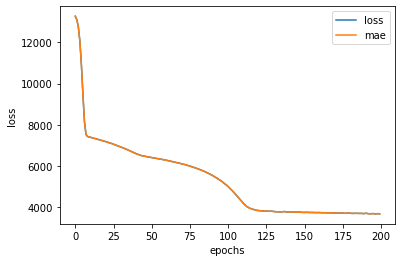

In [539]:
# plot history --> also known as loss curve or training curve

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# shows loss curve decreasing --> as the model learns --> its loss goes down , mae goes down --> this curve shows this

In [540]:
# tensorflow EarlyStopping Callback  -> a tensorflow component to add to model to stop training once it stops improving a certain metric

In [541]:
# another way of preprocessing data -> standardization and normalization
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


<AxesSubplot:>

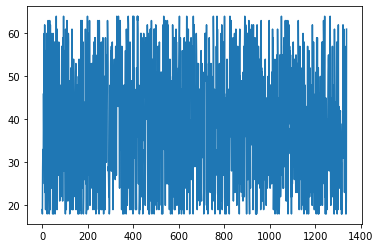

In [542]:
# can see that age is on a diferent scale to what bmi is
X["age"].plot()

<AxesSubplot:ylabel='Frequency'>

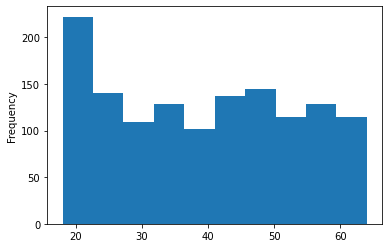

In [545]:
X["age"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

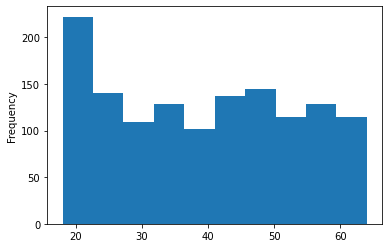

In [546]:
X["age"].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

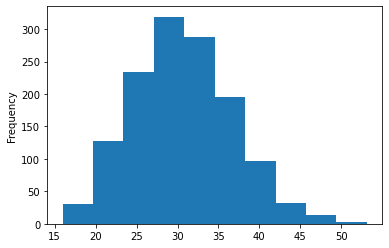

In [547]:
X["bmi"].plot(kind="hist")


In [548]:
# if we wanted to get these both on a similar scale
# as age goes from 20 to 60, bmi goes from 15 to 50

In [549]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [550]:
# if we wanted to get all of these between 0 and 1 --> that is what normalization does
# distribution means spread of the data

# if we change the age column to be a normal distribution --> it will reduce the effects of outlier values

# normalization --> in terms of scaling values , neural networks tend to prefer normalization
# can use both and find which performs better


In [552]:
# normalization

import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# read the data frame
insu = pd.read_csv("C:\\Users\\dell\\Downloads\\insurance.csv")  # to reinstantiate the data frame
insu

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# normalize the numerical and non-numerical features

# normalize the numerical features of insurance data frame
# to prepare data , use some classes fro Scikit-Learn

In [564]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# creating column transformer --> have to transform the columns in some way before passing to neural network
ct = make_column_transformer(
     (MinMaxScaler(), ["age", "bmi", "children"]),  # turn all values in these columns between 0 and 1
      (OneHotEncoder(handle_unknown = "ignore"), ["sex", "smoker", "region"])
) 

# Create X and y values

X = insu.drop("charges", axis=1)
y = insu["charges"]

# create training and test data sets 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # 80-20% split data, random_state is for so that split happens exactly same otherwise it will give the difefrent results

# fit the column transformer to the training data and then use that fit ct to transformer your test data

ct.fit(X_train)

# transform training and test data with normalization (MinMaxScaler and OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [565]:
#  checking the data 
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [566]:
X_train_normal[0]  # now the data is like below

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [567]:
X_train_normal[1]

array([0.63043478, 0.22491256, 0.        , 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        ])

In [568]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [569]:
# checking the shapes
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [571]:
ins_model_2.summary()

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 100)               1200      
_________________________________________________________________
dense_79 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_80 (Dense)             (None, 1)                 11        
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [573]:
# as data is normalized and one_hot encoded we can build model and fit normalized data on it.
tf.random.set_seed(42)

ins_model_4 = tf.keras.Sequential([
                tf.keras.layers.Dense(100),
                tf.keras.layers.Dense(10),
                tf.keras.layers.Dense(1)
])

ins_model_4.compile(loss = tf.keras.losses.mae,
                    optimizer = tf.keras.optimizers.Adam(),
                    metrics = ["mae"])

# we are changing the data here -> normalized data here
ins_model_4.fit(X_train_normal, y_train, epochs = 100)  # fitting on the same labels 


Epoch 1/100
34/34 [==============================] - 14s 14ms/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13189.5830 - mae: 13189.5830
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 11925.

In [574]:
# evaluate the model build using normalized data

# have to evaluate the model on normalized data
ins_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 1s 6ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

In [ ]:
#so, this model performed better than model 2 by normalizing data

# we just converted the values of the target features to be between 0 and 1
# normalization --> gives a faster convergence time --> model gets to a better result

In [580]:
# as data is normalized and one_hot encoded we can build model and fit normalized data on it.
tf.random.set_seed(42)

ins_model_5 = tf.keras.Sequential([
                tf.keras.layers.Dense(100),
                tf.keras.layers.Dense(100),
                tf.keras.layers.Dense(10),
                tf.keras.layers.Dense(1)
])

ins_model_5.compile(loss = tf.keras.losses.mae,
                    optimizer = tf.keras.optimizers.Adam(),
                    metrics = ["mae"])

# we are changing the data here -> normalized data here
ins_model_5.fit(X_train_normal, y_train, epochs = 200)  # fitting on the same labels 


Epoch 1/200
34/34 [==============================] - 2s 3ms/step - loss: 13340.0576 - mae: 13340.0576
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13274.2119 - mae: 13274.2119
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 12902.4678 - mae: 12902.4678
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 11627.9072 - mae: 11627.9072
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 9409.8906 - mae: 9409.8906
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 8040.1831 - mae: 8040.1831
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 7812.9692 - mae: 7812.9692
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7643.8770 - mae: 7643.8770
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7474.1938 - mae: 7474.1938
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 7287.1401 - mae: 7

34/34 [==============================] - 0s 3ms/step - loss: 3482.6233 - mae: 3482.6233
Epoch 162/200
34/34 [==============================] - 0s 3ms/step - loss: 3476.7083 - mae: 3476.7083
Epoch 163/200
34/34 [==============================] - 0s 3ms/step - loss: 3478.5120 - mae: 3478.5120
Epoch 164/200
34/34 [==============================] - 0s 3ms/step - loss: 3484.9939 - mae: 3484.9939
Epoch 165/200
34/34 [==============================] - 0s 3ms/step - loss: 3477.8071 - mae: 3477.8071
Epoch 166/200
34/34 [==============================] - 0s 3ms/step - loss: 3479.2524 - mae: 3479.2524
Epoch 167/200
34/34 [==============================] - 0s 3ms/step - loss: 3479.6860 - mae: 3479.6860
Epoch 168/200
34/34 [==============================] - 0s 3ms/step - loss: 3480.8809 - mae: 3480.8809
Epoch 169/200
34/34 [==============================] - 0s 3ms/step - loss: 3477.9646 - mae: 3477.9646
Epoch 170/200
34/34 [==============================] - 0s 3ms/step - loss: 3482.1099 - mae: 3482

In [2]:
# neural network classification

# multilabel --> multiple labels per sample
# mutilclass --> only one label per sample

# our model needs to like -->
# we need to pass numerical data
# numerical encode the images
# colour channels of our image --> red, green and blue pixels combination in 224 by 224 -> going to give us image
# turn inputs to tensors --> numerical encoding which are the normalized pixel values between 0 and 1
# have to turn images into numbers in some way before passing to algorithm
# for an image we have to grab the pixel vales
# the algo figures out patterns in the input tensors or in the input image and create some predicted output based on looking at lot of actual samples of image-label pair.

# batch size --> 32 is common, depending on data, size of chip --> it may have only that much memory to look at 32 samples, images at one time.
# means our algorithm may only look at 32 images at a time so tha it does not run out of memory.

# output shape may be (will be equal to) the no of classes in multi -class classification

In [3]:
# width, heifht, no of colour channels  -> can change depending on the problem
# 224 pixels wide, 224 pixels high, 3 difefrent colour channels
# reLu - Rectified linear unit

In [4]:
# neural network classification --> where we classify something as one thing or another
# binary classification, multi-class classification, multi-label classification

In [5]:
# creating data to view and fit

from sklearn.datasets import make_circles

# taking 1000 examples
n_samples = 1000;

# creating circles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)  # for classification

In [6]:
# see features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [7]:
X[0], X[999]

(array([0.75424625, 0.23148074]), array([0.28105665, 0.96382443]))

In [8]:
# see the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [9]:
# this is binary class classification
# visualize the data

import pandas as pd
# turn into a dataframe
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

# so, we have two features per label

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


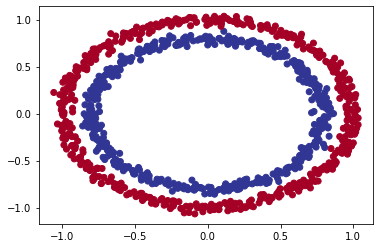

In [10]:
# visualizing with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.RdYlBu)  # cmap is the colour layer

In [11]:
# classify red or blue dots --> we try to draw a line throgh a middle of these two
# if we have another 100 rows and if we gave values like these --> will they be 0 or 1 (red or blue)

In [14]:
# difference between this data and regression data (in terms of images)
# input and output shapes of our neural network

# check shapes of our labels and features
X.shape, y.shape  # X has a shape of 2, y is scalar -> does not have second dimension, 1000 samples of each

((1000, 2), (1000,))

In [15]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [16]:
# check no of samples 
len(X), len(y)

(1000, 1000)

In [17]:
# example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [18]:
X[11], y[11]

(array([0.5694666 , 0.84476776]), 0)

In [22]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [23]:
# modelling steps
# neural network classify if something is a blue dot or a red dot

# steps are typically --> create or import a model, compile the model, fit the model, evaluate the model, tweak , evaluate
import tensorflow as tf
tf.random.set_seed(42)

# create using sequential api
# using 1 hidden layer
model_1 = tf.keras.Sequential([
          tf.keras.layers.Dense(1)
])

# compile

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])  # out of 100 examples, how many our model got right - what percentage

model_1.fit(X, y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 3s 4ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - ETA: 0s - loss: 0.6950 - accuracy: 0.50 - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4820


In [25]:
# accuracy is 48 percent --> means on an average, out of 100 examples our model gets only 48 right


# train for longer to improve the model

model_1.fit(X, y, epochs = 200, verbose = 0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [32]:
# we are working on a binary classification problem and our model is getting around 50% accuracy it is performing as if it is guessing so 
# adding another layer to improve the model

# set the random seed
tf.random.set_seed(42)


model_2 = tf.keras.Sequential([
          tf.keras.layers.Dense(1),
          tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

model_2.fit(X, y, epochs = 100, verbose=0)  # ideally we should fit on the training data and evaluate on the testing data

In [33]:
# evaluate the model

model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5000


[0.6949684619903564, 0.5]

In [34]:
circles["label"].value_counts()

0    500
1    500
Name: label, dtype: int64

In [35]:
# improve the model

# create - add more layers, or increase no of hidden units within a layer
# compliling a model - use a different optimization function 
# fitting a model - fit our model for more epochs --> train for longer


In [37]:
# increase the no of hidden units , adding an extra layer

tf.random.set_seed(42)

# create
model_3 = tf.keras.Sequential([
          tf.keras.layers.Dense(100),  # adding 100 dense neurons
          tf.keras.layers.Dense(10),   # adding anothe layer with 10 neurons
          tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),   #  loss function is that how wrong our model predictions are
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_3.fit(X, y, epochs = 100, verbose = 0)

In [38]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980255246162415, 0.5080000162124634]

In [39]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [40]:
model_3.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 100)               300       
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 11        
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


In [41]:
# make predictions and visualize

model_3.predict(X)

array([[0.48793244],
       [0.558876  ],
       [0.56292844],
       [0.5705067 ],
       [0.44141144],
       [0.57388216],
       [0.5576486 ],
       [0.48246646],
       [0.4775583 ],
       [0.57502264],
       [0.514849  ],
       [0.530877  ],
       [0.56437737],
       [0.45787305],
       [0.45052725],
       [0.461299  ],
       [0.5405582 ],
       [0.4638092 ],
       [0.5479803 ],
       [0.50375676],
       [0.5063044 ],
       [0.58775455],
       [0.4590246 ],
       [0.49123323],
       [0.583216  ],
       [0.5704256 ],
       [0.55239356],
       [0.4631735 ],
       [0.45773405],
       [0.45440978],
       [0.47872233],
       [0.57856053],
       [0.5554615 ],
       [0.46339148],
       [0.45849162],
       [0.58986676],
       [0.5724737 ],
       [0.52974397],
       [0.45870548],
       [0.51092887],
       [0.49994153],
       [0.5463086 ],
       [0.51099026],
       [0.4579724 ],
       [0.5223273 ],
       [0.53888035],
       [0.44872284],
       [0.544

In [65]:
import numpy as np

In [74]:
# visualize this model's predictions
# make a plotting function
# plot our model predictions against the actual data

# plot_decision_boundary() : # this function will take in a trained model features x and labels y,
                           # create a meshgrid of the difefrent X values and make predictions
                           # across the meshgrid, then plot the predictions as well as a line between zones ( where each unique class falls)
            
            
def plot_decision_boundary(model, X, y) :
    # plots decision boundary created by a model predicting on X
    
    # define the axis boundaries of the plot and create a meshgrid
    
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1    # we do 0.1 to give margin 
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    
    # creating the meshgrid ( see documentation)
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), # linspace() returns evenly spaced numbers over a specified interval --> we want evenly specified numbers between x_min and x_max 
                         np.linspace(y_min, y_max, 100))  # means return 100 values evenly spaced between y_min and y_max and create a meshgrid between the two parameters
    
    # create X values and make predictions on these
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
    
    # make predictions
    y_pred = model.predict(x_in)
    
    # check for multi-class classification --> if we have R, B, green circles --> multiple classes
    
    if len(y_pred[0]) > 1 :
        print("doing multi-class classification")
        # we have to reshape our predictions to get them ready
        y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
    
    else :
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    # plotting the decision boundary
    
    plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
    plt.scatter(X[ :, 0], X[ :, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

doing binary classification


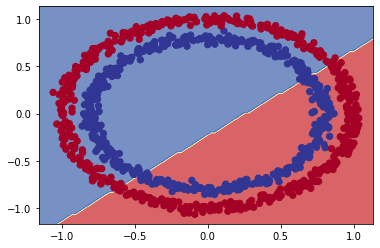

In [75]:
# plotting 
# decision boundary -> cut off point between the decisions it is making red and blue dots  
plot_decision_boundary(model = model_3, X = X, y = y)

In [ ]:
# the above plot shows that our model is trying to make a straight line through the data
# we have got circular data, so the issu here is that our data is not separable by a staright line
# if we do regression problem --> model can work because it is drawing a straight line

In [62]:
#    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1   # we do 0.1 to give margin 

y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    
x_min, x_max, y_min, y_max   # these are the boundaries to create our meshgrid


(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

In [76]:
# as our model is drawing a straight line --> can we adopt it to a regression problem
# it is predicting that the decision boundary is linear, a straight(linear) line but our data is circular or non-linear

In [78]:
# using the above model for a regression problem

tf.random.set_seed(42)

# creating regression data

X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

X_regression, y_regression

(<tf.Tensor: shape=(200,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
        780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
    

In [79]:
# split our regression data into training and test sets

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = Y_regression[:150]
y_reg_test = y_regression[150:]


# fit model of classification to regression data

model_3.fit(X_reg_train, y_reg_train, epochs = 100)  

# this will give error because of shape issue
# because the model was compiled for binary classification problem but we tried it on regression problem
# loss function was BinaryCrossentropy()

# so we change our loss function

Epoch 1/100


ValueError: in user code:

    F:\saicharan\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    F:\saicharan\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    F:\saicharan\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    F:\saicharan\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    F:\saicharan\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    F:\saicharan\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    F:\saicharan\lib\site-packages\keras\engine\training.py:787 train_step
        y_pred = self(x, training=True)
    F:\saicharan\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    F:\saicharan\lib\site-packages\keras\engine\input_spec.py:250 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_7 is incompatible with the layer: expected axis -1 of input shape to have value 2 but received input with shape (None, 1)


In [81]:
# changing the loss function in mosdel 3 so that loss function is regression specific

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
          tf.keras.layers.Dense(100),
          tf.keras.layers.Dense(10),
          tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])

model_3.fit(X_reg_train, y_reg_train, epochs = 100)

Epoch 1/100
5/5 [==============================] - 1s 8ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

5/5 [==============================] - 0s 3ms/step - loss: 38.8399 - mae: 38.8399
Epoch 88/100
5/5 [==============================] - 0s 2ms/step - loss: 38.6604 - mae: 38.6604
Epoch 89/100
5/5 [==============================] - 0s 2ms/step - loss: 38.7559 - mae: 38.7559
Epoch 90/100
5/5 [==============================] - 0s 3ms/step - loss: 38.5442 - mae: 38.5442
Epoch 91/100
5/5 [==============================] - 0s 2ms/step - loss: 38.3247 - mae: 38.3247
Epoch 92/100
5/5 [==============================] - 0s 2ms/step - loss: 38.8431 - mae: 38.8431
Epoch 93/100
5/5 [==============================] - 0s 3ms/step - loss: 39.1137 - mae: 39.1137
Epoch 94/100
5/5 [==============================] - 0s 3ms/step - loss: 38.1463 - mae: 38.1463
Epoch 95/100
5/5 [==============================] - 0s 2ms/step - loss: 38.3998 - mae: 38.3998
Epoch 96/100
5/5 [==============================] - 0s 2ms/step - loss: 38.5599 - mae: 38.5599
Epoch 97/100
5/5 [==============================] - 0s 2ms/step

In [82]:
model_3.evaluate(X_reg_test, y_reg_test)

2/2 [==============================] - 0s 4ms/step - loss: 57.8926 - mae: 57.8926


[57.892578125, 57.892578125]

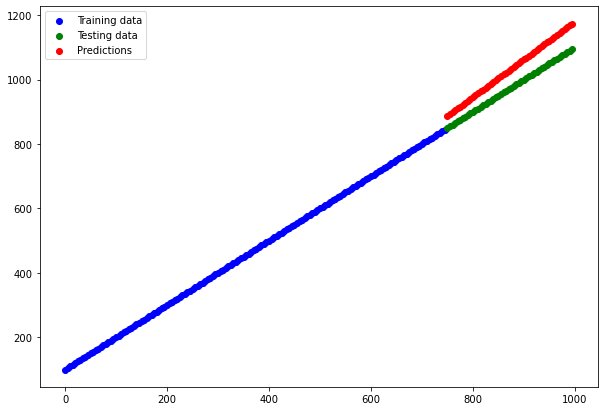

In [86]:
# plot regression data,
# make predictions with the trained model
y_reg_pred = model_3.predict(X_reg_test)

# plot the model's predictions against the regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label = "Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label = "Testing data")
plt.scatter(X_reg_test, y_reg_pred, c = "r", label = "Predictions")
plt.legend()

In [87]:
# this regression is a straght line, but our classification data is not a straight line, not linear --> 
# but the decision boundary our model is trying to plot is linear, straight line
# we have not included non-linearity in our model for classification